# EDA of simulation results

In [1]:
import numpy as np
import pandas as pd
from emcee import autocorr

## Look at one output file

In [2]:
N = "3"
T = "01"
L = "32"
G = "10"
filenameA = f"../improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/N{N}L{L}M1C{G}0T{T}-masa.txt"
filenameB = f"../improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/N{N}L{L}M1C{G}0T{T}-1.txt"

In [4]:
import os 
# assert os.path.isfile(filenameA)
assert os.path.isfile(filenameB)


In [7]:
print(filenameB)

../improv_runs/bmn2_su3_g10/l32/t01/N3L32M1C100T01-1.txt


The output files (`.txt`) have a header that needs to be removed. The log files (`log`) correspond only to the final run and do not have a header.

In [5]:
#data = pd.read_csv(filenameA, sep='\s+', skiprows=7, names=["tj","dH","e","p","x2","f2","ub","acc"], dtype=float)
data_new = pd.read_csv(filenameB, sep='\s+', skiprows=7, names=["tj","dH","e","p","x2","f2","ub","acc"], dtype=float)

In [6]:
data_new.head()

,tj,dH,e,p,x2,f2,ub,acc
0,1050.0,-0.060529,0.880685,0.262632,0.580096,0.400784,3.108624e-15,0.94
1,1100.0,0.032478,0.711394,0.678184,0.538631,0.230351,6.217249e-15,0.92
2,1150.0,0.466330,0.698006,0.515443,0.517966,0.240054,7.105427e-15,0.90
3,1200.0,0.133437,0.670510,0.337793,0.512288,0.210964,5.329071e-15,0.90
4,1250.0,0.112810,0.953321,0.544472,0.626902,0.435225,5.329071e-15,0.88


(<AxesSubplot:>, <AxesSubplot:>)

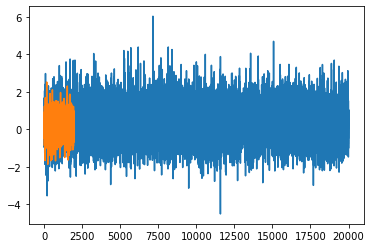

In [6]:
data.dH.plot(), data_new.dH.plot()

(<AxesSubplot:>, <AxesSubplot:>)

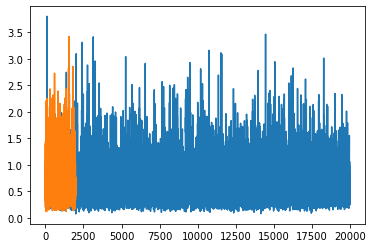

In [8]:
data.x2.plot(), data_new.x2.plot()

(<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>)

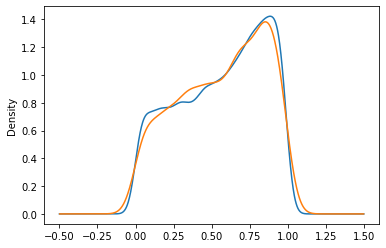

In [12]:
data.p.plot(kind="kde"), data_new.p.plot(kind="kde")

(<AxesSubplot:>, <AxesSubplot:>)

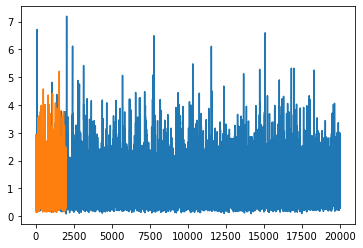

In [13]:
data.e.plot(), data_new.e.plot()

(<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>)

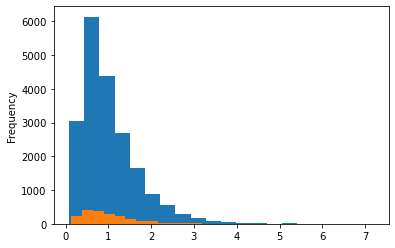

In [14]:
data.e.plot(kind="hist", bins=20), data_new.e.plot(kind="hist", bins=20)

(<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>)

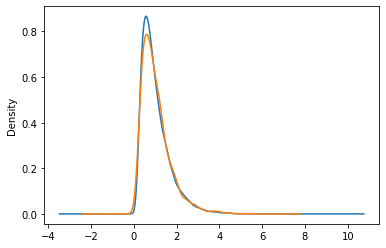

In [15]:
data.e.plot(kind="kde"), data_new.e.plot(kind="kde")

(<AxesSubplot:>, <AxesSubplot:>)

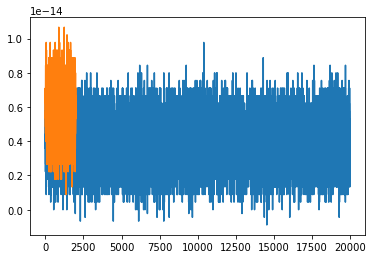

In [16]:
data.ub.plot(), data_new.ub.plot()

<AxesSubplot:>

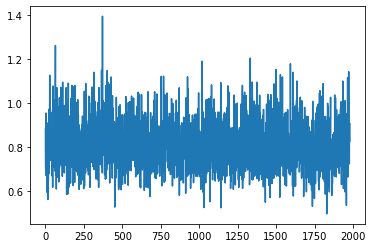

In [10]:
data_new.e.plot()

In [11]:
tau = autocorr.integrated_time(data_new.e.values)
print(tau[0])

1.1599786113325998


In [12]:
#data.describe().T
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
tj,1980.0,5.052500e+04,2.858605e+04,1.050000e+03,2.578750e+04,5.052500e+04,7.526250e+04,1.000000e+05
dH,1980.0,3.610920e-02,2.771050e-01,-7.941471e-01,-1.527569e-01,2.978012e-02,2.303458e-01,1.041399e+00
e,1980.0,8.142154e-01,1.153689e-01,4.947258e-01,7.302135e-01,8.104705e-01,8.886055e-01,1.393338e+00
p,1980.0,3.027573e-01,1.544176e-01,1.235386e-02,1.906337e-01,2.845812e-01,3.929154e-01,8.718721e-01
x2,1980.0,5.786306e-01,6.697519e-02,3.754687e-01,5.310619e-01,5.768826e-01,6.217714e-01,8.650590e-01
f2,1980.0,3.141132e-01,7.358306e-02,1.370376e-01,2.607419e-01,3.066209e-01,3.597758e-01,7.043725e-01
ub,1980.0,5.401964e-15,1.581292e-15,4.440892e-16,4.440892e-15,5.329071e-15,6.661338e-15,1.021405e-14
acc,1980.0,8.977481e-01,3.637657e-03,8.800000e-01,8.954678e-01,8.964819e-01,8.990348e-01,9.400000e-01


In [18]:
np.mean(data_new.e * float(N)**2)

4.127846764264638

# Extract $E$

Use the log file which is always the last simulation output. Remember there is no header...

In [9]:
Ts = ["04", "035", "03", "025", "02", "015", "01", "005", "0025"]
Ls = ["16", "24", "32", "48", "64", "96", "128", "192"]
cut = 10 # thermalization cut in units of 50 trajectories: if tau=1 then cut=10 is 10x the autocorr time
N = 3
G = "20"
for L in Ls:
    for T in Ts:
        filename = f"../improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/log"
        try:
            data = pd.read_csv(filename, sep="\s+", names=["tj","dH","e","p","x2","f2","ub","acc"], dtype=float)
            data.e = data.e * float(N)**2
            avg, std = data.iloc[cut:].e.mean(), data.iloc[cut:].e.std()
            bins = data.iloc[cut:].shape[0]
            tau = autocorr.integrated_time(data.iloc[cut:].e.values)
            print(f"T=0.{T[1:]} L={L}\nAverage energy: {avg:.4f} +/- {std/np.sqrt(bins):.4f} | bins={bins} | tau={tau[0]:.2f}")
        except (ValueError, FileNotFoundError) as e:
            print(f"{e} . Skipping...")

T=0.4 L=16
Average energy: 8.8283 +/- 0.0538 | bins=1970 | tau=1.11
T=0.35 L=16
Average energy: 8.5070 +/- 0.0485 | bins=1970 | tau=0.90
T=0.3 L=16
Average energy: 8.2727 +/- 0.0441 | bins=1970 | tau=0.99
T=0.25 L=16
Average energy: 8.1079 +/- 0.0404 | bins=1970 | tau=0.96
T=0.2 L=16
Average energy: 7.7807 +/- 0.0349 | bins=1970 | tau=0.83
T=0.15 L=16
Average energy: 7.3221 +/- 0.0294 | bins=1970 | tau=1.05
T=0.1 L=16
Average energy: 6.6139 +/- 0.0238 | bins=1970 | tau=0.96
T=0.05 L=16
Average energy: 5.3149 +/- 0.0151 | bins=1970 | tau=0.83
T=0.025 L=16
Average energy: 3.9545 +/- 0.0096 | bins=1970 | tau=0.95
T=0.4 L=24
Average energy: 9.1856 +/- 0.0543 | bins=1970 | tau=1.11
T=0.35 L=24
Average energy: 9.0673 +/- 0.0513 | bins=1970 | tau=0.91
T=0.3 L=24
Average energy: 8.8670 +/- 0.0465 | bins=1970 | tau=0.91
T=0.25 L=24
Average energy: 8.6057 +/- 0.0409 | bins=1970 | tau=0.84
T=0.2 L=24
Average energy: 8.3094 +/- 0.0382 | bins=1970 | tau=0.74
T=0.15 L=24
Average energy: 7.8969 +/- 0

* Create an ouput csv file with the energies (multiplied by $N^2$)

In [10]:
Ts = ["04", "035", "03", "025", "02", "015", "01", "005", "0025"]#, "001"]
Ls = ["16", "24", "32", "48", "64", "96", "128", "192"]
cut = 10 # thermalization cut in units of 100 trajectories
N = 3
G = "20"
# header
print(f"T,L,E,err,bins,tau")
for L in Ls:
    for T in Ts:
        filename = f"../improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/log"
        try:
            data = pd.read_csv(filename, sep="\s+", names=["tj","dH","e","p","x2","f2","ub","acc"], dtype=float)
            data.e = data.e * float(N)**2
            avg, std = data.iloc[cut:].e.mean(), data.iloc[cut:].e.std()
            bins = data.iloc[cut:].shape[0]
            tau = autocorr.integrated_time(data.iloc[cut:].e.values)
            print(f"0.{T[1:]},{L},{avg:.4f},{std/np.sqrt(bins):.4f},{bins},{tau[0]:.2f}")
        except (ValueError, FileNotFoundError) as e:
            pass

T,L,E,err,bins,tau
0.4,16,8.8283,0.0538,1970,1.11
0.35,16,8.5070,0.0485,1970,0.90
0.3,16,8.2727,0.0441,1970,0.99
0.25,16,8.1079,0.0404,1970,0.96
0.2,16,7.7807,0.0349,1970,0.83
0.15,16,7.3221,0.0294,1970,1.05
0.1,16,6.6139,0.0238,1970,0.96
0.05,16,5.3149,0.0151,1970,0.83
0.025,16,3.9545,0.0096,1970,0.95
0.4,24,9.1856,0.0543,1970,1.11
0.35,24,9.0673,0.0513,1970,0.91
0.3,24,8.8670,0.0465,1970,0.91
0.25,24,8.6057,0.0409,1970,0.84
0.2,24,8.3094,0.0382,1970,0.74
0.15,24,7.8969,0.0315,1970,1.04
0.1,24,7.3464,0.0241,1970,0.97
0.05,24,6.0649,0.0160,1970,0.95
0.025,24,4.7627,0.0104,1970,1.14
0.4,32,9.3927,0.0537,1970,0.98
0.35,32,9.0946,0.0480,1970,0.87
0.3,32,9.2345,0.0470,1970,1.15
0.25,32,8.9520,0.0407,1970,1.07
0.2,32,8.7181,0.0375,1970,1.12
0.15,32,8.3410,0.0313,1970,0.91
0.1,32,7.7613,0.0253,1970,1.06
0.05,32,6.6045,0.0168,1970,1.15
0.025,32,5.3221,0.0106,1970,1.00
0.4,48,9.6276,0.0539,1970,1.00
0.35,48,9.5493,0.0522,1970,0.87
0.3,48,9.3833,0.0468,1970,0.98
0.25,48,9.3467,0.0425,1970,0.96


### Finite temperature runs

In [11]:
Ts = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10"]
Ls = ["16", "24", "32", "48", "64", "96", "128", "192"]
cut = 5 # thermalization cut in units of 100 trajectories
N = 2
G = "10"
# header
print(f"T,L,E,err,bins,tau")
for L in Ls:
    for T in Ts:
        filename = f"../improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/log"
        try:
            data = pd.read_csv(filename, sep="\s+", names=["tj","dH","e","p","x2","f2","ub","acc"], dtype=float)
            data.e = data.e * float(N)**2
            avg, std = data.iloc[cut:].e.mean(), data.iloc[cut:].e.std()
            bins = data.iloc[cut:].shape[0]
            tau = autocorr.integrated_time(data.iloc[cut:].e.values)
            # T is treated as a number
            print(f"{int(T)/10:.1f},{L},{avg:.4f},{std/np.sqrt(bins):.4f},{bins},{tau[0]:.2f}")
        except (ValueError, FileNotFoundError) as e:
            pass

T,L,E,err,bins,tau
0.1,16,2.3593,0.0134,1975,0.76
0.2,16,2.7986,0.0204,1975,0.92
0.3,16,2.9725,0.0263,1955,1.02
0.4,16,3.0794,0.0310,1955,0.97
0.5,16,3.1925,0.0344,1975,0.97
0.6,16,3.3095,0.0400,1975,1.05
0.7,16,3.5350,0.0486,1975,1.02
0.8,16,3.5356,0.0500,1975,1.11
0.9,16,3.8143,0.0554,1975,1.06
1.0,16,4.0055,0.0627,1975,0.91
0.1,24,2.5931,0.0140,1975,1.00
0.2,24,2.9265,0.0203,1975,0.91
0.3,24,3.1035,0.0265,1975,0.88
0.4,24,3.1613,0.0297,1955,1.15
0.5,24,3.2657,0.0345,1975,0.75
0.6,24,3.4522,0.0410,1975,0.74
0.7,24,3.5958,0.0447,1975,0.95
0.8,24,3.6414,0.0486,1975,0.92
0.9,24,3.8823,0.0566,1975,1.13
1.0,24,4.0061,0.0576,1975,0.96
0.1,32,2.7371,0.0141,1975,0.97
0.2,32,3.0587,0.0207,1975,1.05
0.3,32,3.1597,0.0258,1975,1.15
0.4,32,3.2724,0.0304,1975,1.08
0.5,32,3.3803,0.0362,1995,0.96
0.6,32,3.4324,0.0410,1995,0.94
0.7,32,3.6111,0.0438,1995,0.94
0.8,32,3.7112,0.0504,1995,0.91
0.9,32,3.8486,0.0536,1995,0.96
1.0,32,4.0917,0.0589,1995,1.11
0.1,48,2.9108,0.0145,1975,0.97
0.2,48,3.1941,0.0211

# Extract $R^2$

### EDA

### Loop over temperatures

In [17]:
Ts = ["04", "03", "025", "02", "015", "01", "005"] #, "0025", "001"]
Ls = ["16", "24", "32", "48", "64", "96", "128", "192"]
cut = 5 # thermalization cut in units of 50 trajectories
N = 3
G = "05"
for L in Ls:
    for T in Ts:
        filename = f"../improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/log"
        try:
            data = pd.read_csv(filename, sep="\s+", names=["tj","dH","e","p","x2","f2","ub","acc"], dtype=np.float)
            data.x2 = data.x2 * float(N)
            avg, std = data.iloc[cut:].x2.mean(), data.iloc[cut:].x2.std()
            bins = data.iloc[cut:].shape[0]
            tau = autocorr.integrated_time(data.iloc[cut:].x2.values)
            print(f"T=0.{T[1:]} L={L}\nAverage R2: {avg:.4f} +/- {std/np.sqrt(bins):.4f} | bins={bins} | tau={tau[0]:.2f}")
        except (ValueError, FileNotFoundError) as e:
            print(f"{e} . Skipping...")

T=0.4 L=16
Average R2: 2.0789 +/- 0.0159 | bins=985 | tau=0.78
T=0.3 L=16
Average R2: 1.9954 +/- 0.0123 | bins=985 | tau=1.04
T=0.25 L=16
Average R2: 1.9666 +/- 0.0118 | bins=985 | tau=0.88
T=0.2 L=16
Average R2: 1.9048 +/- 0.0103 | bins=985 | tau=0.83
T=0.15 L=16
Average R2: 1.8249 +/- 0.0089 | bins=985 | tau=1.14
T=0.1 L=16
Average R2: 1.6902 +/- 0.0071 | bins=985 | tau=0.80
T=0.05 L=16
Average R2: 1.4378 +/- 0.0050 | bins=985 | tau=0.96
T=0.4 L=24
Average R2: 2.0948 +/- 0.0137 | bins=985 | tau=0.95
T=0.3 L=24
Average R2: 2.0593 +/- 0.0130 | bins=985 | tau=0.97
T=0.25 L=24
Average R2: 2.0601 +/- 0.0117 | bins=985 | tau=0.97
T=0.2 L=24
Average R2: 2.0134 +/- 0.0100 | bins=985 | tau=1.45
T=0.15 L=24
Average R2: 1.9216 +/- 0.0089 | bins=985 | tau=0.76
T=0.1 L=24
Average R2: 1.8125 +/- 0.0073 | bins=985 | tau=1.03
T=0.05 L=24
Average R2: 1.5803 +/- 0.0049 | bins=985 | tau=1.10
T=0.4 L=32
Average R2: 2.1672 +/- 0.0154 | bins=985 | tau=0.90
T=0.3 L=32
Average R2: 2.1287 +/- 0.0128 | bins=9

Return $R$ instead of $R^2$ for comparison with the Neural Network result

In [18]:
Ts = ["04", "03", "025", "02", "015", "01", "005"] #, "0025", "001"]
Ls = ["16", "24", "32", "48", "64", "96", "128", "192"]
cut = 5 # thermalization cut in units of 50 trajectories
N = 3
G = "05"
# header
print(f"T,L,R,err,bins,tau")
for L in Ls:
    for T in Ts:
        filename = f"../improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/log"
        try:
            data = pd.read_csv(filename, sep="\s+", names=["tj","dH","e","p","x2","f2","ub","acc"], dtype=np.float)
            data.x2 = np.sqrt(data.x2 * float(N))
            avg, std = data.iloc[cut:].x2.mean(), data.iloc[cut:].x2.std()
            bins = data.iloc[cut:].shape[0]
            tau = autocorr.integrated_time(data.iloc[cut:].x2.values)
            print(f"0.{T[1:]},{L},{avg:.4f},{std/np.sqrt(bins):.4f},{bins},{tau[0]:.2f}")
        except (ValueError, FileNotFoundError) as e:
            pass

T,L,R,err,bins,tau
0.4,16,1.4318,0.0054,985,0.80
0.3,16,1.4061,0.0043,985,1.03
0.25,16,1.3962,0.0042,985,0.87
0.2,16,1.3752,0.0037,985,0.83
0.15,16,1.3469,0.0033,985,1.13
0.1,16,1.2972,0.0027,985,0.81
0.05,16,1.1973,0.0021,985,0.96
0.4,24,1.4399,0.0047,985,0.95
0.3,24,1.4281,0.0045,985,0.98
0.25,24,1.4297,0.0041,985,0.96
0.2,24,1.4146,0.0035,985,1.44
0.15,24,1.3826,0.0032,985,0.76
0.1,24,1.3436,0.0027,985,1.03
0.05,24,1.2556,0.0019,985,1.11
0.4,32,1.4634,0.0051,985,0.89
0.3,32,1.4526,0.0043,985,0.99
0.25,32,1.4477,0.0037,985,0.95
0.2,32,1.4261,0.0036,985,1.00
0.15,32,1.4118,0.0031,985,0.79
0.1,32,1.3763,0.0026,985,0.88
0.05,32,1.2989,0.0020,985,1.17
0.4,48,1.4755,0.0050,985,1.14
0.3,48,1.4589,0.0043,985,0.78
0.25,48,1.4636,0.0038,985,1.00
0.2,48,1.4473,0.0033,985,0.67
0.15,48,1.4339,0.0032,985,0.95
0.1,48,1.4114,0.0025,985,0.90
0.05,48,1.3484,0.0019,985,1.16
0.4,64,1.4779,0.0046,985,1.00
0.3,64,1.4762,0.0042,985,0.88
0.25,64,1.4667,0.0038,985,1.00
0.2,64,1.4626,0.0035,985,0.99
0.15,64,

# Temperature dependence

In [26]:
eq = "../improv_runs/bmn2_su2_g10/e0_quadratic.csv"
df_eq = pd.read_csv(eq)
df_eq

,T,E,err
0,0.1,3.383,0.037
1,0.2,3.549,0.054
2,0.3,3.562,0.069
3,0.4,3.602,0.080
4,0.5,3.519,0.090
5,0.6,3.647,0.105
6,0.7,3.692,0.117
7,0.8,4.140,0.130
8,0.9,3.975,0.143
9,1.0,4.358,0.156


<AxesSubplot:xlabel='T'>

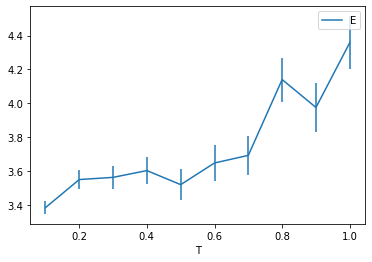

In [27]:
df_eq.plot(x="T", y="E", yerr="err")

In [30]:
el = "../improv_runs/bmn2_su2_g10/e0_linear_no16.csv"
df_el = pd.read_csv(el)
df_el

,T,E,err
0,0.1,3.280,0.021
1,0.2,3.462,0.030
2,0.3,3.487,0.039
3,0.4,3.552,0.045
4,0.5,3.543,0.050
5,0.6,3.631,0.059
6,0.7,3.705,0.065
7,0.8,4.010,0.072
8,0.9,4.025,0.080
9,1.0,4.287,0.087


<AxesSubplot:xlabel='T'>

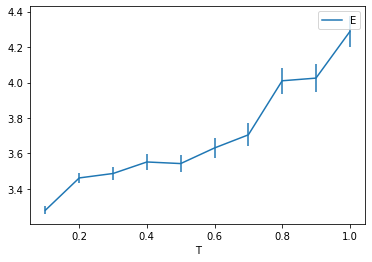

In [31]:
df_el.plot(x="T", y="E", yerr="err")

<AxesSubplot:xlabel='T'>

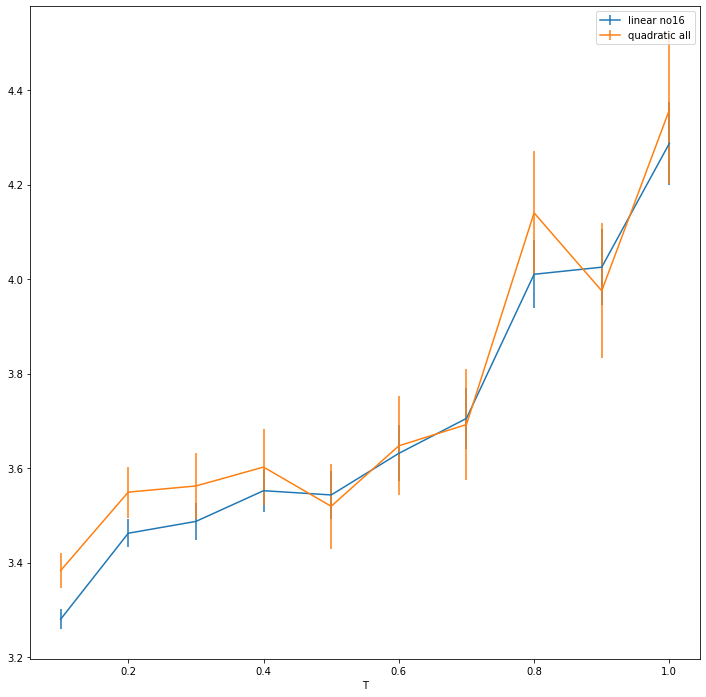

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))
df_el.plot(x="T", y="E", yerr="err", label="linear no16", ax=ax)
df_eq.plot(x="T", y="E", yerr="err", label="quadratic all", ax=ax)